### Imports

In [1]:
import numpy as np
import pandas as pd 
from collections import Counter
import os
import glob
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib.backends.backend_pdf import PdfPages
import math
from matplotlib.lines import Line2D
import umap.umap_ as umap
from combat.pycombat import pycombat

### Read every cohort study file

In [2]:
# datasets = [pd.read_csv(file, index_col=0, low_memory=False) for file in sorted(glob.glob('../cohort_studies_full_data/' + "/*."+'csv'))]
# cohorts = [file.split(".")[0] for file in sorted(os.listdir('../cohort_studies_full_data/'))]

In [3]:
# # make a dictionary that contains all cohorts as a dataframe
# cohort_studies = dict()
# # dfsss = dict()

# for cohort, dataset in zip(cohorts, datasets):
#     cohort_n = cohort.split("_MERGE")[0]
#     cohort_studies[cohort_n] = dataset.loc[dataset['Months']==0].copy() # reduce to BL visit
# #     dfsss[cohort_n] = dataset

In [4]:
# datasets_sub = [pd.read_csv(file, index_col=0, low_memory=False) for file in sorted(glob.glob('../preprocessed_datasets/' + "/*."+'csv'))]
# cohorts_sub = [file.split(".")[0] for file in sorted(os.listdir('../preprocessed_datasets/'))]

In [5]:
# # make a dictionary that contains all cohorts as a dataframe
# cohort_studies_sub = dict()

# for cohort, dataset in zip(cohorts_sub, datasets_sub):
#     cohort_studies_sub[cohort] = dataset.loc[dataset['Months']==0].copy() # reduce to BL visit

In [6]:
# # add the preprocessed columns from sub table of each dataset to the main table of dataset
# for i in cohort_studies:
# #     cols = cohort_studies_sub[i].columns.difference(cohort_studies[i].columns)
#     cols = ['Age', 'Sex', 'Education', 'APOE4', 'CDR', 'Race']
    
#     for col in cols:
        
#         if col in cohort_studies_sub[i].columns:
#             cohort_studies[i][col] = cohort_studies_sub[i][col]

### Read harmonized mapping tables

In [7]:
# modality = [pd.read_csv(file, sep=',') for file in sorted(glob.glob('../feature_tables' + "/*."+'csv'))]
# name = [file.split(".")[0] for file in sorted(os.listdir('../feature_tables'))]

In [8]:
# # make a dictionary that contains all modalities as a dataframe
# mappings = dict()

# for moda, na in zip(modality, name):
#     mappings[na.split(' - ')[1]] = moda

In [9]:
# harmonized_features = pd.concat(mappings, ignore_index=True) # combine all tables

In [10]:
# # exclude categorical and taboo features
# harmonized_features = harmonized_features.loc[(harmonized_features['Rank']!=1) & (harmonized_features['Rank']!=2)]

### Read the feature availability files for all cohorts

In [11]:
# ava_mapp = [pd.read_csv(file, sep='\t') for file in sorted(glob.glob('../feature_availability_in_cohorts' + "/*."+'tsv'))]
# tablesss = [file.split(".")[0] for file in sorted(os.listdir('../feature_availability_in_cohorts'))]

In [12]:
# # make a dictionary that contains all modalities as a dataframe
# available_features = dict()

# for modal, df in zip(tablesss, ava_mapp):
#     available_features[modal] = df

In [13]:
# existing_features = pd.concat(available_features, ignore_index=True) # combine all tables

In [14]:
# existing_features.replace({0: np.nan}, inplace=True) # 0 indicates that the feature was not measured 

### Read cutoffs obtained using all methods

In [15]:
# table_method = [pd.read_csv(file, index_col=0, low_memory=False) for file in sorted(glob.glob('../results/cutoffs/' + "/*."+'csv'))]
# method_name = [file.split(".")[0] for file in sorted(os.listdir('../results/cutoffs/'))]

In [16]:
# # make a dictionary that contains each cutoff table as a dataframe
# cutoffs_ = dict()

# for tm, mn in zip(table_method, method_name):
#     cutoffs_[mn] = tm

In [17]:
# [cutoffs_['km_cutoffs'].rename(columns={col: col.split('_')[0]}, inplace=True) for col in cutoffs_['km_cutoffs'].columns]

[None, None, None]

### Selecetion of cohort studies for A/T/N assignment

### Select the patient that have CSF biomarker, disregard the diagnostic status

In [18]:
# atn = pd.DataFrame(index=available_features['csf'].iloc[:3].replace({0: np.nan}).dropna(axis=1).columns[1:].to_list(), columns=mappings['csf'].Feature.loc[0:2].to_list()+(["Total"]))
# # atn = pd.DataFrame(index=cohort_studies, columns=['A', 'T', 'N'])

In [19]:
# for cohort in atn.index:
#     for feat in mappings['csf'][cohort].loc[0:2].dropna().to_list():
#         if feat in cohort_studies[cohort].columns:
#             atn.loc[cohort, mappings['csf'].loc[mappings['csf'][cohort]==feat, 'Feature']] = len(cohort_studies[cohort][feat].dropna())
#             atn.loc[cohort, 'Total'] = len(cohort_studies[cohort][mappings['csf'][cohort].loc[0:2].dropna().to_list()].dropna())

In [20]:
# atn

In [21]:
# diag = pd.DataFrame(index=available_features['csf'].iloc[:3].replace({0: np.nan}).dropna(axis=1).columns[1:].to_list(), columns=cohort_studies['ADNI']['Diagnosis'].dropna().unique())

In [22]:
# for cohort in diag.index:
#     for dia in diag.columns:
#         diag.loc[cohort, dia] = len(cohort_studies[cohort].loc[cohort_studies[cohort]['Diagnosis']==dia][mappings['csf'][cohort].loc[0:2].dropna().to_list()].dropna())

### Remove the empty columns from all cohorts that we are intrested in
### Remove the participant without all 3 CSF biomarkers

In [23]:
# selected_cohorts = dict()

# for coh in diag.index:
#     selected_cohorts[coh] = cohort_studies[coh].dropna(axis=1, how='all')

In [24]:
# total_feats = dict()

# # existing_features.set_index('Feature', inplace=True)

# for feat in existing_features.Feature:
#     total_feats[feat] = existing_features.loc[existing_features.Feature==feat][selected_cohorts].dropna(axis=1).columns

In [25]:
# for cohort in atn.index:
#     feat = mappings['csf'][cohort].loc[0:2].dropna().to_list()
#     cohort_studies[cohort] = cohort_studies[cohort].dropna(subset=feat)

As Some features have suffix due to merging tables for certain cohorts, first investigate if all the harmonized features are in cohorts. Rename the ones that have suffix so it can be compatible to work with our harmonized names.

In [26]:
# cohort_studies['ADNI'] = cohort_studies['ADNI'].rename(columns={'PTEDUCAT_x': 'PTEDUCAT', 'TRABSCOR_bl': 'TRABSCOR', 'LDELTOTAL_BL': 'LDELTOTAL'})

### CSF biomarkers, two classes, normal vs abnormal

In [27]:
# # modality_ = ['clinical_i', 'clinical_ii','hippocampus', 'csf']
# # modality_ = ['basal_ganglia', 'brain_poles_volume', 'cerebellum', 'clinical_i', 
# #             'clinical_ii', 'csf', 'diencephalus', 'general_brain', 
# #             'mri_others', 'pet', 'plasma', 'ventricles', 'hippocampus']
# modality_ = ['basal_ganglia', 'brain_poles_volume', 'cerebellum', 'csf', 'diencephalus', 'general_brain', 
#             'mri_others', 'pet', 'plasma', 'ventricles', 'hippocampus']

# selected_feat = dict()

# for i in modality_:
#     selected_feat[i] = mappings[i]

In [28]:
# # make a dataframe containing all the mapped features
# features_all = pd.concat(selected_feat, ignore_index=True)

In [29]:
# features_all = features_all[atn.index.union(['Feature', 'Rank'])] # subset the cohorts of interest

In [30]:
# # remove the features that are not available in all studies
# features_all = features_all.loc[features_all['Feature'].isin(existing_features[atn.index.union(['Feature'])].dropna(how='all')['Feature'].to_list())]

### Convert MRI measurements to mm3, same as ADNI and other cohorts

In [31]:
# mri_nacc = ['basal_ganglia', 'brain_poles_volume', 'cerebellum', 'diencephalus', 'general_brain', 
#             'mri_others', 'pet', 'plasma', 'ventricles', 'hippocampus']

# for i in mri_nacc:
    
#     for variable in mappings[i][['Feature', 'NACC']].dropna()['Feature'].to_list():
        
#         if "Volume" in variable:
#             nacc_var = mappings[i].loc[mappings[i]['Feature']==variable, 'NACC']
#             cohort_studies['NACC'][nacc_var] = cohort_studies['NACC'][nacc_var] * 1000

In [32]:
# nacc_mri_to_convert = list()

# for i in mri_nacc:
    
#     for feat_ in mappings[i]['NACC'].dropna().to_list():
#         nacc_mri_to_convert.append(feat_)

* Rank 1 --> Categorical features
* Rank 2 --> Taboo features: some categorical and some numerical
* Rank nan --> Numerical features 

replace nan with 0

In [33]:
# features_all['Rank'].replace({np.nan: 0}, inplace=True)

In [34]:
# features_all.replace({"No total score.": np.nan}, inplace=True)

In [35]:
# # fix PharmaCog column names
# for i in cohort_studies['PharmaCog'].columns:
#     if "\xa0" in i:
#         new = str(i).replace(u'\xa0', u'')
#         cohort_studies['PharmaCog'].rename(columns={i: new}, inplace=True)

## Prepare datasets

In [36]:
# def umap_atn_participants(dfss, cohorts, thresholds, features):
#     """cohorts: list of cohort names 
#        dfss: dictionary of cohorts where each key is the name of a cohort
#        thresholds: cutoff values obtained using a methodology
       
#        Select the features and participants and categorize the participant into ATN profiles using thresholds
#        obtained from each methodology.
       
#        return a df which contain the combination of paticipant from the selected cohorts while harmonizing
#        the features names.
#     """
    
#     # make a list of additional features to be investigated 
# #     additional_feat = ['Age', 'Sex', 'Education', 'APOE4', 'CDR', 'Race']
#     additional_feat = ['APOE4']

#     # make an empty dictionary to add the datasets to
#     df_= pd.DataFrame(columns=set(features.loc[features['Rank']==0]
#                                   [cohorts + ['Feature']].dropna()['Feature']).difference(['Feature'] + list(thresholds.columns)).union(additional_feat))
   
#     for i in cohorts:
# #         print(i)

#         dfs = dict()
#         dfs[i] = dfss[i].copy() # make a copy of the dataset of interest
#         # select the subset of datasets with features to be investigated
#         dfs[i] = dfs[i][features.loc[features['Rank']==0][cohorts + ['Feature']].dropna()[i].to_list() + additional_feat].dropna(axis=1, how='all')
#         # rename all the columns so we can concat the datasets later
#         [dfs[i].rename(columns={col: coln}, inplace=True) for col, coln in 
#          zip(features.loc[features['Rank']==0][cohorts + ['Feature']].dropna()[i].to_list(), 
#              features.loc[features['Rank']==0][cohorts + ['Feature']].dropna()['Feature'].to_list())]
#         dfs[i]['Cohort'] = i # add a cohort name column
#         # change the datatype to str as these are categorical features. astype doesn't work as it will include nan values
#         dfs[i] = dfs[i].replace({'APOE4': {0.0: '0', 2.0: '2', 1.0: '1'}}) 

#         if i!='NACC':
            
#             for biomarker in thresholds.columns:
#                 # select the cutoff value for each biomarker for each cohort
#                 threshold = thresholds.loc[i][biomarker]

#                 # dichotomize the participants
#                 if biomarker == 'pTau in CSF': 
#                     dfs[i].loc[dfs[i][biomarker]>threshold, "T"] = 'T+'
#                     dfs[i].loc[dfs[i][biomarker]<threshold, "T"] = 'T-'

#                 elif biomarker == 'tTau in CSF': 
#                     dfs[i].loc[dfs[i][biomarker]>threshold, "N"] = 'N+'
#                     dfs[i].loc[dfs[i][biomarker]<threshold, "N"] = 'N-'

#                 else: 
#                     dfs[i].loc[dfs[i][biomarker]<threshold, "A"] = 'A+'
#                     dfs[i].loc[dfs[i][biomarker]>threshold, "A"] = 'A-'

#             # join the 3 columns to make the final ATN categorie                                 
#             dfs[i]['ATN'] = dfs[i]['A'] + dfs[i]['T'] + dfs[i]['N']
#             # remove the columns that we are not interested in
#             dfs[i] = dfs[i][dfs[i].columns.difference(['A', 'T', 'N', 'Mini-Mental State Examination (MMSE)'] + list(thresholds.columns))]
            
#         else:
            
#             elisa_index = cohort_studies[i].loc[(cohort_studies[i]['CSFTTMD']==1)].index
#             xmap_index = cohort_studies[i].loc[(cohort_studies[i]['CSFTTMD']==2)].index
            
#             for biomarker in thresholds.columns:
#                 # select the cutoff value for each biomarker for each cohort
#                 elisa = thresholds.loc[i + "_ELISA"][biomarker] # ELISA
#                 xmap = thresholds.loc[i + "_XMAP"][biomarker] #XMAP

#                 # dichotomize the participants
#                 if biomarker == 'pTau in CSF': 
                    
#                     dfs[i].loc[(dfs[i].index.isin(elisa_index)) & (dfs[i][biomarker]>elisa), "T"] = 'T+'
#                     dfs[i].loc[(dfs[i].index.isin(elisa_index)) & (dfs[i][biomarker]<elisa), "T"] = 'T-'
#                     dfs[i].loc[(dfs[i].index.isin(xmap_index)) & (dfs[i][biomarker]>xmap), "T"] = 'T+'
#                     dfs[i].loc[(dfs[i].index.isin(xmap_index)) & (dfs[i][biomarker]<xmap), "T"] = 'T-'

#                 elif biomarker == 'tTau in CSF': 
#                     dfs[i].loc[(dfs[i].index.isin(elisa_index)) & (dfs[i][biomarker]>elisa), "N"] = 'N+'
#                     dfs[i].loc[(dfs[i].index.isin(elisa_index)) & (dfs[i][biomarker]<elisa), "N"] = 'N-'
#                     dfs[i].loc[(dfs[i].index.isin(xmap_index)) & (dfs[i][biomarker]>xmap), "N"] = 'N+'
#                     dfs[i].loc[(dfs[i].index.isin(xmap_index)) & (dfs[i][biomarker]<xmap), "N"] = 'N-'

#                 else: 
#                     dfs[i].loc[(dfs[i].index.isin(elisa_index)) & (dfs[i][biomarker]<elisa), "A"] = 'A+'
#                     dfs[i].loc[(dfs[i].index.isin(elisa_index)) & (dfs[i][biomarker]>elisa), "A"] = 'A-'
#                     dfs[i].loc[(dfs[i].index.isin(xmap_index)) & (dfs[i][biomarker]<xmap), "A"] = 'A+'
#                     dfs[i].loc[(dfs[i].index.isin(xmap_index)) & (dfs[i][biomarker]>xmap), "A"] = 'A-'

#             # join the 3 columns to make the final ATN categorie                                 
#             dfs[i]['ATN'] = dfs[i]['A'] + dfs[i]['T'] + dfs[i]['N']
#             # remove the columns that we are not interested in
#             dfs[i] = dfs[i][dfs[i].columns.difference(['A', 'T', 'N', 'Mini-Mental State Examination (MMSE)', 'Trail Making Test (TMT) A', 'Verbal fluency tests (Semantic) Animal'] + list(thresholds.columns))]
            
# #         print(dfs[i])

        
#         df_ = pd.concat([df_, dfs[i]])
# #         print(df_)
# #         df_ = df_.dropna(axis=1, thresh=len(df_.index)/2)
# #         print(df_)
    
#     df_ = df_.dropna(axis=1, how='all')
#     df_ = df_.dropna(axis=1, thresh=1200)

#     df_ = df_.dropna()

#     return df_

In [38]:
# def norm_df(df, cohorts_l):
#     """df: concatenated df, containing participants of interested cohort studies
#     cohorts_l: a list of cohorts that are contain in the df
#     normalize the continuous features and apply dummy variable method for categorical features
#     return: a dictionary where the keys are the cohort name and the values are dfs containing preprocessed values 
#     """
#     cohort_dict = dict()
    
#     for i in cohorts_l:
#         sub_df = df.loc[df['Cohort']==i]
#         # make dummy variables and normalize features 
# #         num = sub_df[sub_df.select_dtypes(exclude='object').columns.difference(['APOE4'])].apply(stats.zscore)
#         num = sub_df[sub_df.select_dtypes(exclude='object').columns.difference(['APOE4'])]
#         cat = pd.get_dummies(sub_df['APOE4'].dropna(), prefix='APOE4')
#         others = sub_df[['ATN', 'Cohort']]
#         data_f = pd.concat([num, cat, others], axis=1)
#         cohort_dict[i] = data_f
        
#     return cohort_dict

In [53]:
# def cohorts_vs_method(umap_dfs, cohortsss, methods=None):
#     """
#     cohortsss: selected cohorts for UMAP analysis
#     methods: a list of methods 
#     call the functions to preprocess the cohorts
#     return: a dictionary where the keys are methods for obtaining thresholds and values are df containing the 
#     preprocessed datasets (containing the selected features and cohorts)
#     """
    
#     result_dfs = dict()
    
#     if methods != None:
        
#         for method in methods:
# ###             umap_df = umap_atn_participants(cohort_studies, cohortsss, cutoffs_[method], features_all)
#             umap_df_concat = pd.concat(norm_df(umap_dfs[method], cohortsss), ignore_index=True)

#             for i, j in zip(cohortsss, list(range(len(cohortsss)))):
#                 umap_df_concat.replace({i: j}, inplace=True) # replace cohort names with int values

#             atn_parti = Counter(umap_df_concat['ATN'])
#             remove_atn = list()

#             for i in atn_parti:

#                 if atn_parti[i] < 20:
#                     remove_atn.append(i)

#             for atn_r in remove_atn:
#                 umap_df_concat = umap_df_concat.loc[umap_df_concat['ATN']!=atn_r]

#             result_dfs[method] = umap_df_concat.dropna(axis=1)
            
#     else:
        
#         for method in set(cutoffs_.keys()).difference(["cutoffs_cohort_study"]):
# #             umap_df = umap_atn_participants(cohort_studies, cohortsss, cutoffs_[method], features_all)
#             umap_df_concat = pd.concat(norm_df(umap_dfs[method], cohortsss), ignore_index=True)

#             for i, j in zip(cohortsss, list(range(len(cohortsss)))):
#                 umap_df_concat.replace({i: j}, inplace=True)

#             atn_parti = Counter(umap_df_concat['ATN'])
#             remove_atn = list()

#             for i in atn_parti:

#                 if atn_parti[i] < 20:
#                     remove_atn.append(i)

#             for atn_r in remove_atn:
#                 umap_df_concat = umap_df_concat.loc[umap_df_concat['ATN']!=atn_r]

#             result_dfs[method] = umap_df_concat.dropna(axis=1)

#     return result_dfs

In [70]:
# seven_cohorts_ = cohorts_vs_method(corrected_method_df, ['ADNI', 'EDSD', 'ARWIBO', 'NACC', 'JADNI', 'DOD-ADNI', 'PharmaCog'], ['gmm_cutoffs', 'km_cutoffs'])

#### exclude CSF Volume as it seems wrong in the NACC dataset and that could potentially add bias to our analysis

In [55]:
# no_csf_vol= dict()

# for i in seven_cohorts_:
#     no_csf_vol[i] = seven_cohorts_[i].drop(columns=["Cerebrospinal Fluid Volume"])

In [56]:
# Batch effect correstion

# UMAP_dfs_corrected= dict()

# # perfome the batch correction
# UMAP_dfs_corrected['km_cutoffs'] = pycombat(no_csf_vol['km_cutoffs'].drop(columns=['ATN', 'Cohort', 'APOE4_0', 'APOE4_1', 'APOE4_2']).transpose(), 
#          batch=no_csf_vol['km_cutoffs']['Cohort']).transpose()

# UMAP_dfs_corrected['gmm_cutoffs'] = pycombat(no_csf_vol['gmm_cutoffs'].drop(columns=['ATN', 'Cohort', 'APOE4_0', 'APOE4_1', 'APOE4_2']).transpose(), 
#          batch=no_csf_vol['gmm_cutoffs']['Cohort']).transpose()

# # write back the categorical features to the corrected dfs
# UMAP_dfs_corrected['km_cutoffs'][['ATN', 'Cohort', 'APOE4_0', 'APOE4_1', 'APOE4_2']] = no_csf_vol['km_cutoffs'][['ATN', 'Cohort', 'APOE4_0', 'APOE4_1', 'APOE4_2']]
# UMAP_dfs_corrected['gmm_cutoffs'][['ATN', 'Cohort', 'APOE4_0', 'APOE4_1', 'APOE4_2']] = no_csf_vol['gmm_cutoffs'][['ATN', 'Cohort', 'APOE4_0', 'APOE4_1', 'APOE4_2']]

In [2]:
gmm_corrected_ = pd.read_csv("../results/umap/umap_clustering_dfs/cohorts_k/gmm_cutoffs_cohorts_cluster.csv", index_col=0)
km_corrected_ = pd.read_csv("../results/umap/umap_clustering_dfs/cohorts_k/km_cutoffs_cohorts_cluster.csv", index_col=0)

corrected_method_df = dict()
corrected_method_df['GMM'] = gmm_corrected_.copy() 
corrected_method_df['k-means'] = km_corrected_.copy()

In [3]:
# corrected_method_df['GMM'][corrected_method_df['GMM']['ATN']=='A-T-N-'].head()

In [1]:
# pd.DataFrame(umap.UMAP(n_neighbors=5).fit_transform(corrected_method_df['GMM'].loc[corrected_method_df['GMM']['ATN']=='A-T-N-'][corrected_method_df['GMM'].columns.difference(['Cohort', 'ATN', 'Cohort_number', 'Cluster'])]))

In [ ]:
umap.UMAP(n_neighbors=5).fit_transform(df.loc[df['ATN']==atn_][df.columns.difference(['Cohort', 'ATN', 'Cohort_number', 'Cluster'])])

In [18]:
atn_order = ['A-T-N-', 'A-T+N+', 'A+T+N-', 'A+T-N-', 'A+T+N+', 'A+T-N+', 'A-T-N+']

def plot_result(dfs_dict, list_cohort):
    """"""
    
    color_cohorts = {'ADNI': '#1f77b4', 'NACC': '#d62728', 'JADNI': '#9467bd', 'DOD-ADNI': '#8c564b', 
                     'ARWIBO': '#2ca02c', 'EDSD': '#ff7f0e', 'PharmaCog': '#e377c2'}
    
    for met in dfs_dict:
        df = dfs_dict[met]
        fig, axes = plt.subplots(len(df['ATN'].unique()), figsize=(10, 3 * len(df['ATN'].unique())))
        
        patches = list()
        
        for n in list_cohort:
            patches.append(Line2D([0], [0], color='w', marker='o', markerfacecolor=color_cohorts[n], label=str(n)+f" (n={len(df.loc[df['Cohort']==n])})"))

        for atn_, ind in zip(atn_order, range(len(df['ATN'].unique()))):
            embedding = umap.UMAP(n_neighbors=5).fit_transform(df.loc[df['ATN']==atn_][df.columns.difference(['Cohort', 'ATN', 'Cohort_number', 'Cluster'])])
#             pd.DataFrame(embedding).to_csv(f"../results/umap/umap_figure2_paper/{met}_{atn_}_embedding.csv", index=0)

            scatter = sns.scatterplot(x=embedding[:,0], y=embedding[:,1], ax=axes[ind], linewidth=0, 
                                      s=40, hue=df.loc[df['ATN']==atn_]['Cohort'], 
                                      alpha=0.7, palette=color_cohorts, legend=False)            
            plt.setp(axes[ind], xticks=[], yticks=[])
                     
            axes[ind].set_title(f'{atn_}', fontsize=15)
            fig.suptitle(f'{met}', fontsize=17, fontweight='bold')

            fig.subplots_adjust(top=0.95)
#             plt.savefig(f"../results/umap/umap_figure2_paper/{met}_no_legend.png", dpi=400, bbox_inches='tight')

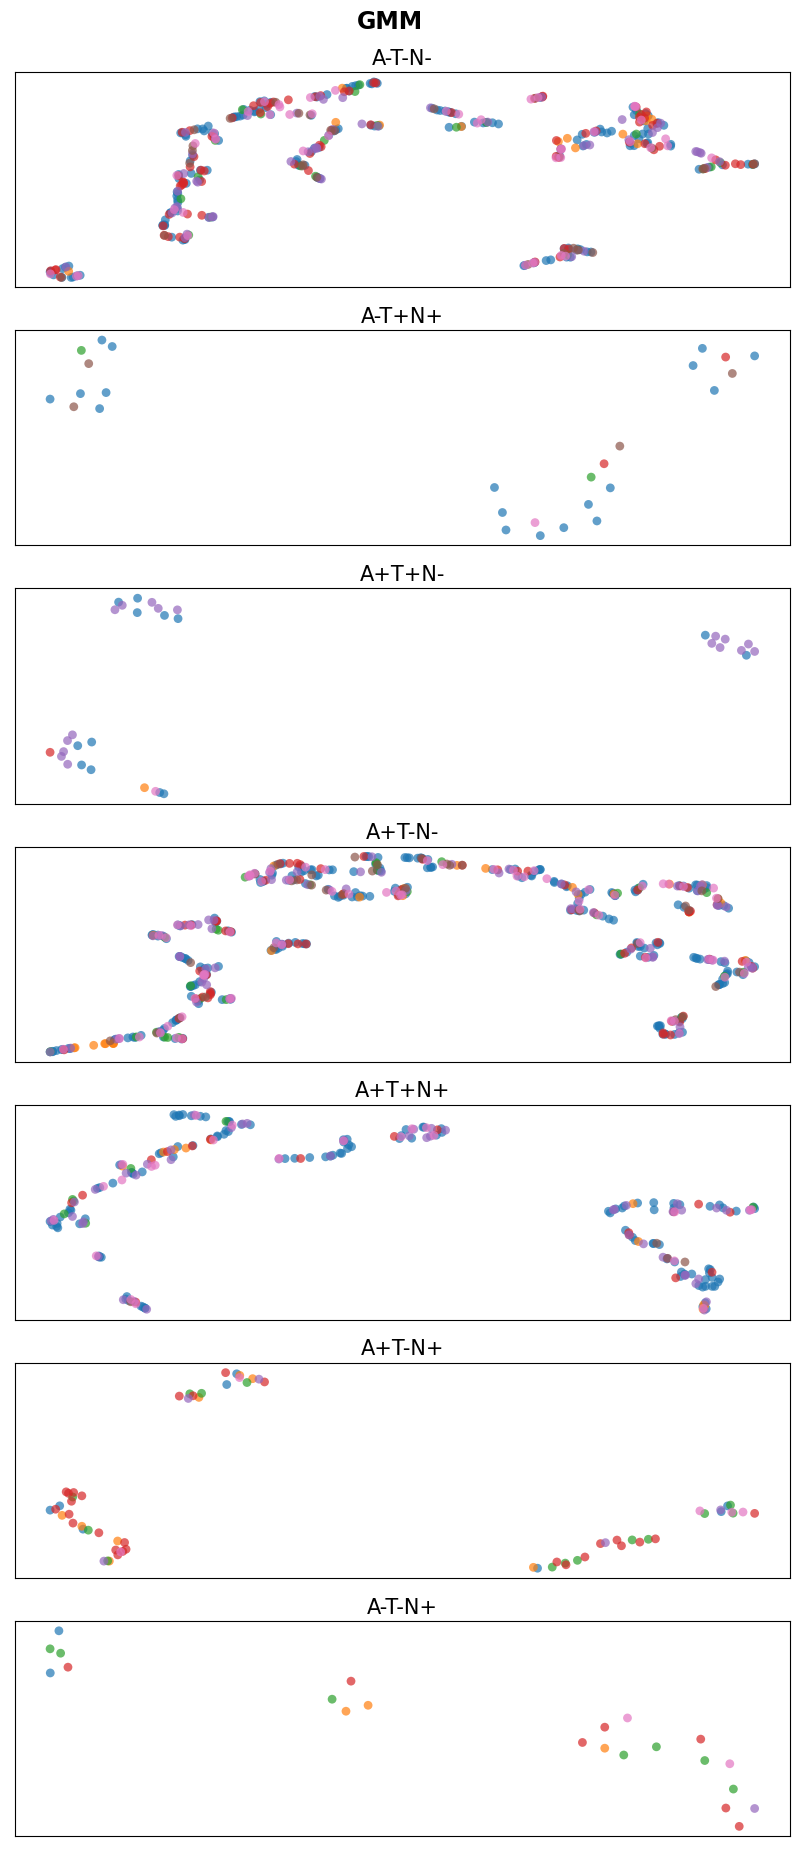

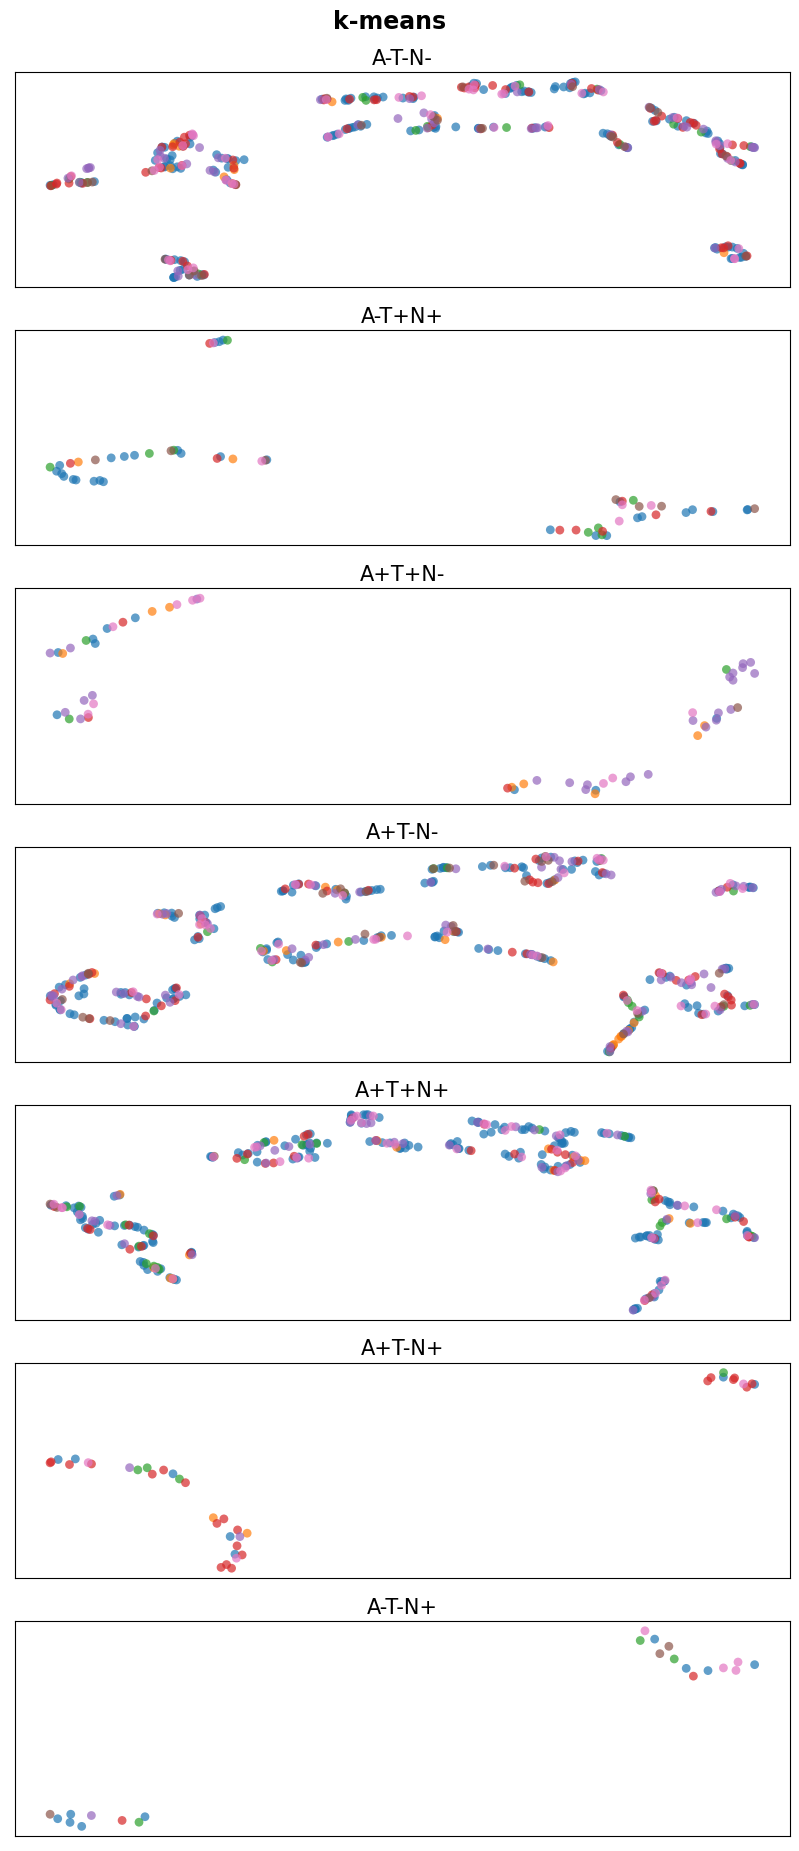

In [19]:
plot_result(corrected_method_df, ['ADNI', 'EDSD', 'ARWIBO', 'NACC', 'JADNI', 'DOD-ADNI', 'PharmaCog'])

### Legend only

In [22]:
atn_order = ['A-T-N-', 'A-T+N+', 'A+T+N-', 'A+T-N-', 'A+T+N+', 'A+T-N+', 'A-T-N+']

def plot_result(dfs_dict, list_cohort):
    """"""
    
    color_cohorts = {'ADNI': '#1f77b4', 'NACC': '#d62728', 'JADNI': '#9467bd', 'DOD-ADNI': '#8c564b', 
                     'ARWIBO': '#2ca02c', 'EDSD': '#ff7f0e', 'PharmaCog': '#e377c2'}
    
    for met in dfs_dict:
        df = dfs_dict[met]
        fig, axes = plt.subplots(len(df['ATN'].unique()), figsize=(10, 3 * len(df['ATN'].unique())))
        
        patches = list()
        
        for n in list_cohort:
            patches.append(Line2D([0], [0], color='w', marker='o', markerfacecolor=color_cohorts[n], label=str(n)+f" (n={len(df.loc[df['Cohort']==n])})"))

        for atn_, ind in zip(atn_order, range(len(df['ATN'].unique()))):
            embedding = umap.UMAP(n_neighbors=5).fit_transform(df.loc[df['ATN']==atn_][df.columns.difference(['Cohort', 'ATN', 'Cohort_number', 'Cluster'])])
                        
            plt.legend(handles=patches, fontsize=14, ncol=2, markerscale=1.5)

            scatter = sns.scatterplot(x=embedding[:,0], y=embedding[:,1], ax=axes[ind], linewidth=0, 
                                      s=0, hue=df.loc[df['ATN']==atn_]['Cohort'], 
                                      alpha=0.7, palette=color_cohorts, legend=False)            
            plt.setp(axes[ind], xticks=[], yticks=[])
                     
            axes[ind].set_title(f'{atn_}', fontsize=15)
            fig.suptitle(f'{met}', fontsize=17, fontweight='bold')

            fig.subplots_adjust(top=0.95)
            plt.savefig(f"../results/umap/umap_figure2_paper/{met}_legend.png", dpi=400, bbox_inches='tight')

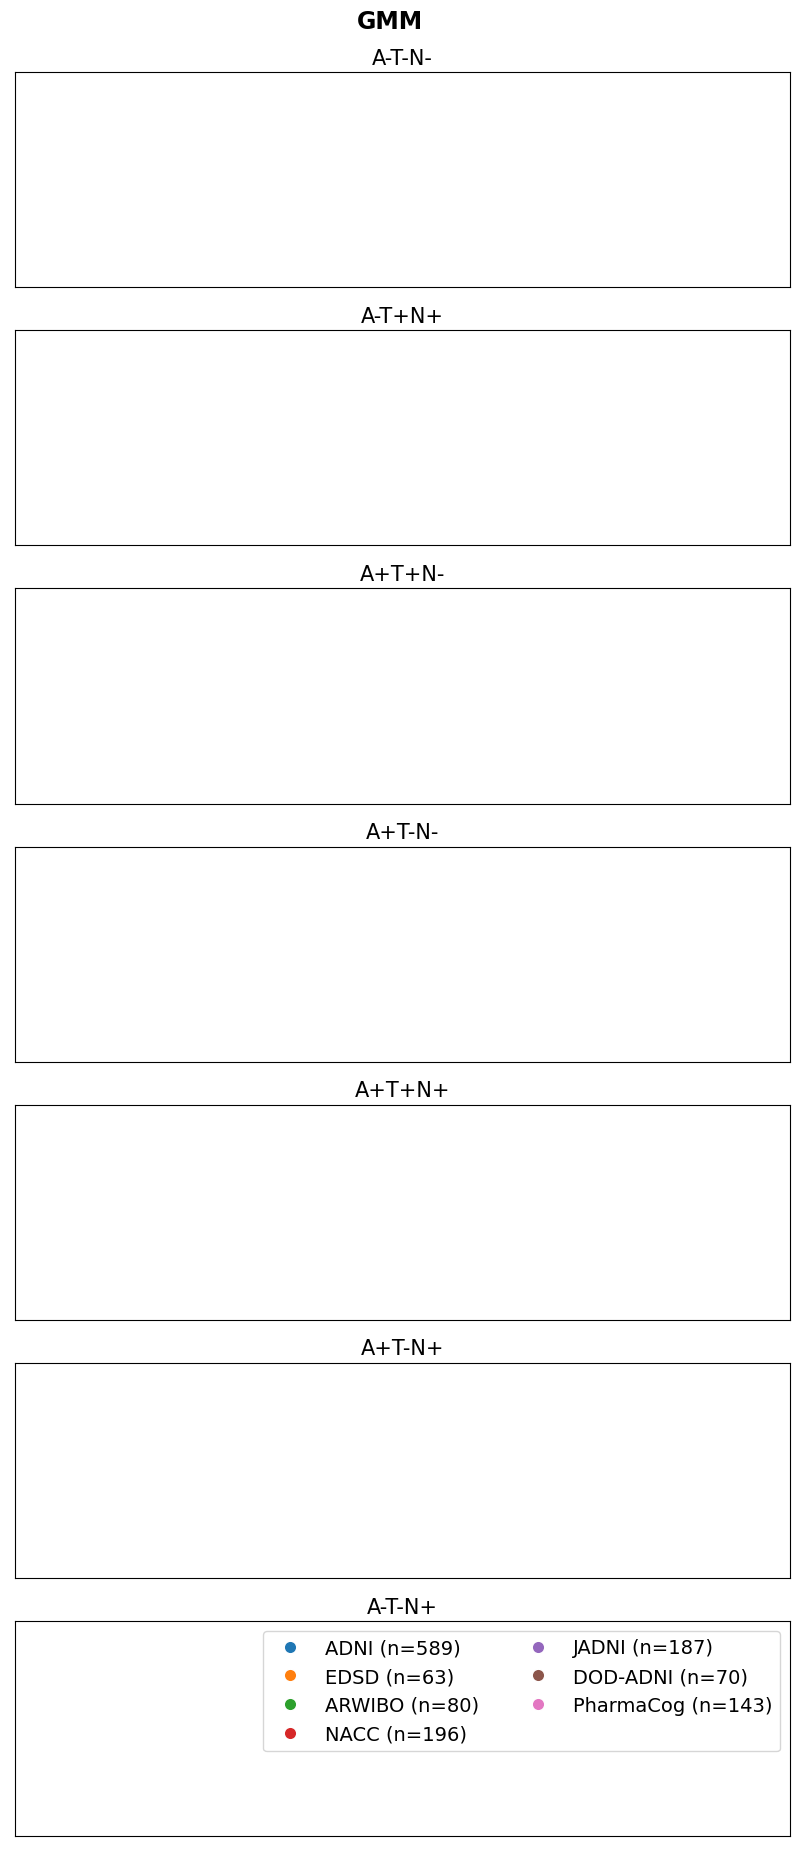

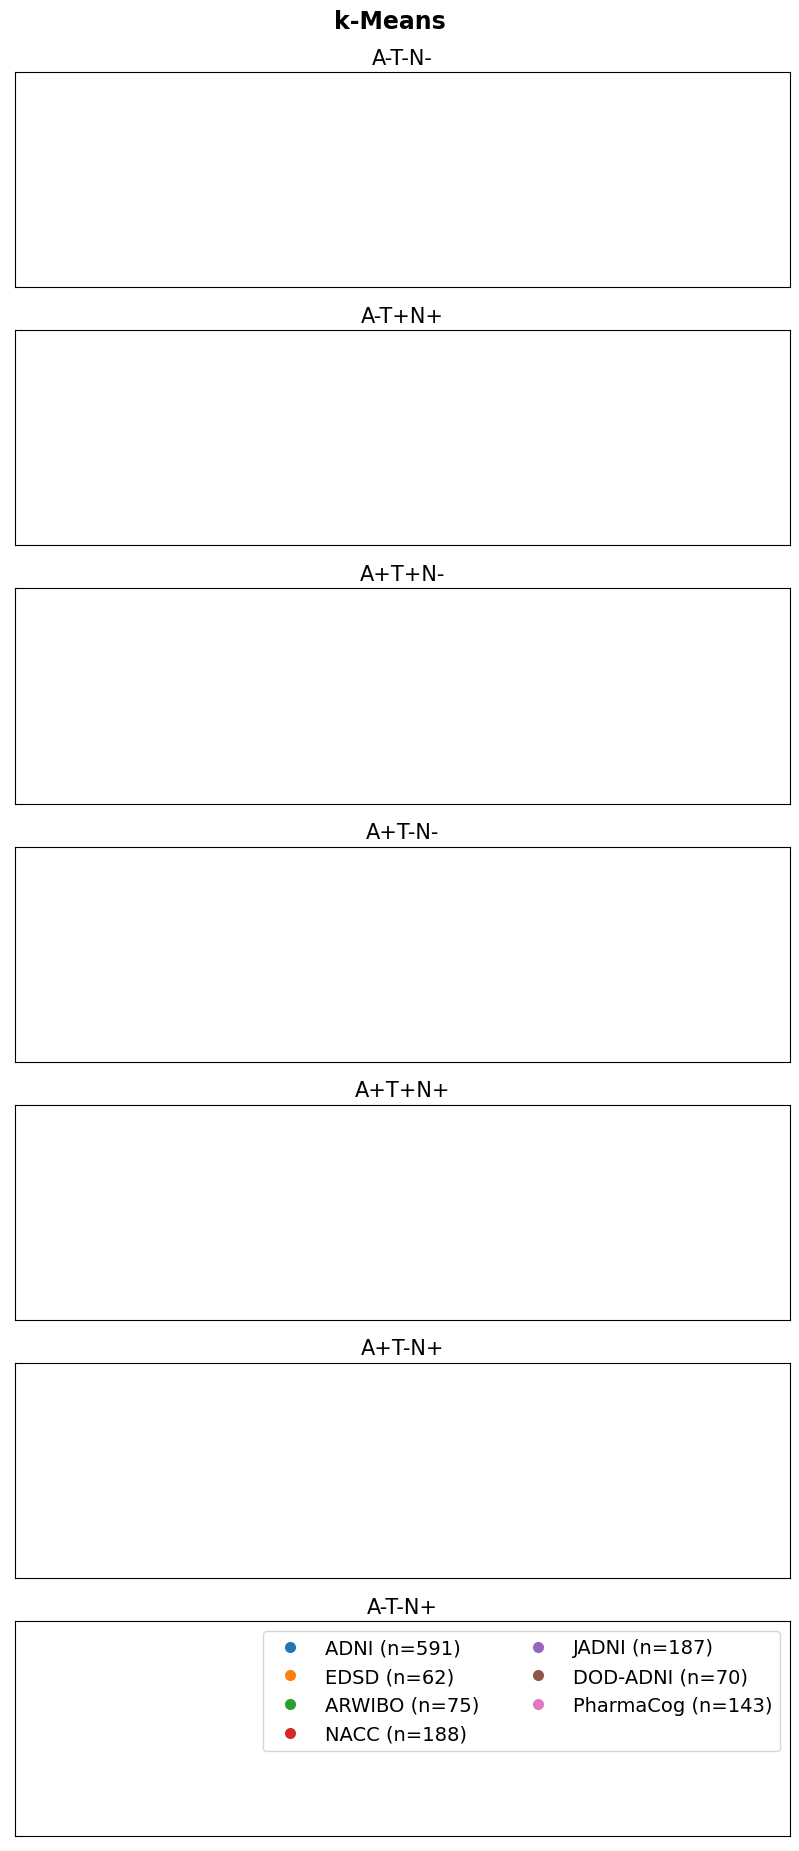

In [23]:
plot_result(corrected_method_df, ['ADNI', 'EDSD', 'ARWIBO', 'NACC', 'JADNI', 'DOD-ADNI', 'PharmaCog'])

In [59]:
# UMAP_dfs_corrected_copy = seven_cohorts_.copy()
# # order ATN the same way as the paper
# atn_order_list = ['A-T-N-', 'A-T+N+', 'A-T-N+', 'A+T+N-', 'A+T-N-', 'A+T-N+', 'A+T+N+']
# list_cohort = ['ADNI', 'EDSD', 'ARWIBO', 'NACC', 'JADNI', 'DOD-ADNI', 'PharmaCog']
# # make a dictionary of dfs, ond df per threshold method
# # rows contain cohort names and columns contain ATN profiles
# pat_pet_prof = {i: pd.DataFrame(index=list_cohort, columns=atn_order_list) for i in UMAP_dfs_corrected_copy}

# for i in UMAP_dfs_corrected_copy:
    
#     for study, num in zip (list_cohort, range(len(list_cohort))):
#         UMAP_dfs_corrected_copy[i]['Cohort'].replace({num: study}, inplace=True)
    
#     for atn in UMAP_dfs_corrected_copy[i]['ATN'].unique():
        
#         for coh__ in UMAP_dfs_corrected_copy[i].loc[UMAP_dfs_corrected_copy[i]['ATN']==atn, 'Cohort'].unique():
#             pat_pet_prof[i].loc[coh__, atn] = len(UMAP_dfs_corrected_copy[i].loc[(UMAP_dfs_corrected_copy[i]['ATN']==atn) & (UMAP_dfs_corrected_copy[i]['Cohort']==coh__)])
        
#         pat_pet_prof[i].loc['Total', atn] = len(UMAP_dfs_corrected_copy[i][UMAP_dfs_corrected_copy[i]['ATN']==atn])
    
#     pat_pet_prof[i].replace({np.nan: 0}, inplace=True)

In [60]:
# for i in pat_pet_prof:
#     pat_pet_prof[i].to_csv(f"../results/umap/final_plots/patintes_in_umap_{i}.csv")

In [61]:
# pat_pet_prof['gmm_cutoffs']

,A-T-N-,A-T+N+,A-T-N+,A+T+N-,A+T-N-,A+T-N+,A+T+N+
ADNI,170,18,2,13,256,8,122
EDSD,14,0,3,1,27,8,10
ARWIBO,23,2,7,0,27,14,7
NACC,80,2,7,1,62,27,17
JADNI,52,0,1,17,63,5,49
DOD-ADNI,28,4,0,0,34,0,4
PharmaCog,46,1,2,1,65,5,23
Total,413,27,22,33,534,67,232


In [62]:
# pat_pet_prof['km_cutoffs']

,A-T-N-,A-T+N+,A-T-N+,A+T+N-,A+T-N-,A+T-N+,A+T+N+
ADNI,161,30,9,9,181,7,194
EDSD,12,2,0,8,22,2,16
ARWIBO,18,8,3,3,17,4,22
NACC,71,9,2,3,48,21,34
JADNI,53,0,1,26,65,2,40
DOD-ADNI,23,7,3,1,31,0,5
PharmaCog,40,5,4,9,40,3,42
Total,378,61,22,59,404,39,353


In [49]:
# Counter(seven_cohorts_['km_cutoffs']['Cohort'])

Counter({'ADNI': 591,
         'EDSD': 62,
         'ARWIBO': 75,
         'NACC': 188,
         'JADNI': 187,
         'DOD-ADNI': 70,
         'PharmaCog': 143})

In [50]:
# pd.DataFrame(seven_cohorts_['gmm_cutoffs'].columns).to_csv(f"../results/umap/final_plots/features.csv")

### Testing

In [51]:

# with PdfPages('../results/umap/final_plots/test_hist.pdf') as pdf:
#     for i in seven_cohorts_:
        
#         coh = seven_cohorts_[i].loc[(seven_cohorts_[i]['Cohort']==0) | (seven_cohorts_[i]['Cohort']==3)]
#         for each_ATN in coh.ATN.unique():

#             for feat in coh.columns[:-5]:
#                 fig, axes = plt.subplots(1, 2, figsize=(15,5))

#                 axes[0].hist(coh.loc[(coh['Cohort']==0) & (coh['ATN']==each_ATN)][feat])
#                 axes[1].hist(coh.loc[(coh['Cohort']==3) & (coh['ATN']==each_ATN)][feat])

#                 axes[0].set_title(f"{feat} in ADNI ({i.split('_')[0].upper()} - {each_ATN})")
#                 axes[1].set_title(f"{feat} in NACC ({i.split('_')[0].upper()} - {each_ATN})")

#                 fig.get_figure()
#                 pdf.savefig(fig)

# # fig.savefig("../results/umap/final_plots/test_hist.pdf", bbox_inches='tight')